In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [51]:
# Load the dataset
data = pd.read_csv('../data/Final_Regression.csv')

In [52]:
# Select the features and target variable
features = ['budget', 'release_month', 'release_year', 
            'belongs_to_collection', 'actor_0_name_encoded', 'actor_1_name_encoded', 
            'actor_2_name_encoded', 'Gender Ratio', 'Average Actor Age', 
            'runtime', 'production_company_name_encoded', 'director_encoded']

# features += ['budget']
# Uncomment the genres you want to include
# features += ['Crime', 'Drama', 'War', 'Western', 'Family', 'Thriller', 
#              'Fantasy', 'Mystery', 'Animation', 'Music', 'Romance', 
#              'Adventure', 'History', 'Science Fiction', 'Comedy', 
#              'TV Movie', 'Documentary', 'Horror', 'Action']

# Get the names of the features
feature_names = features
target = 'revenue'

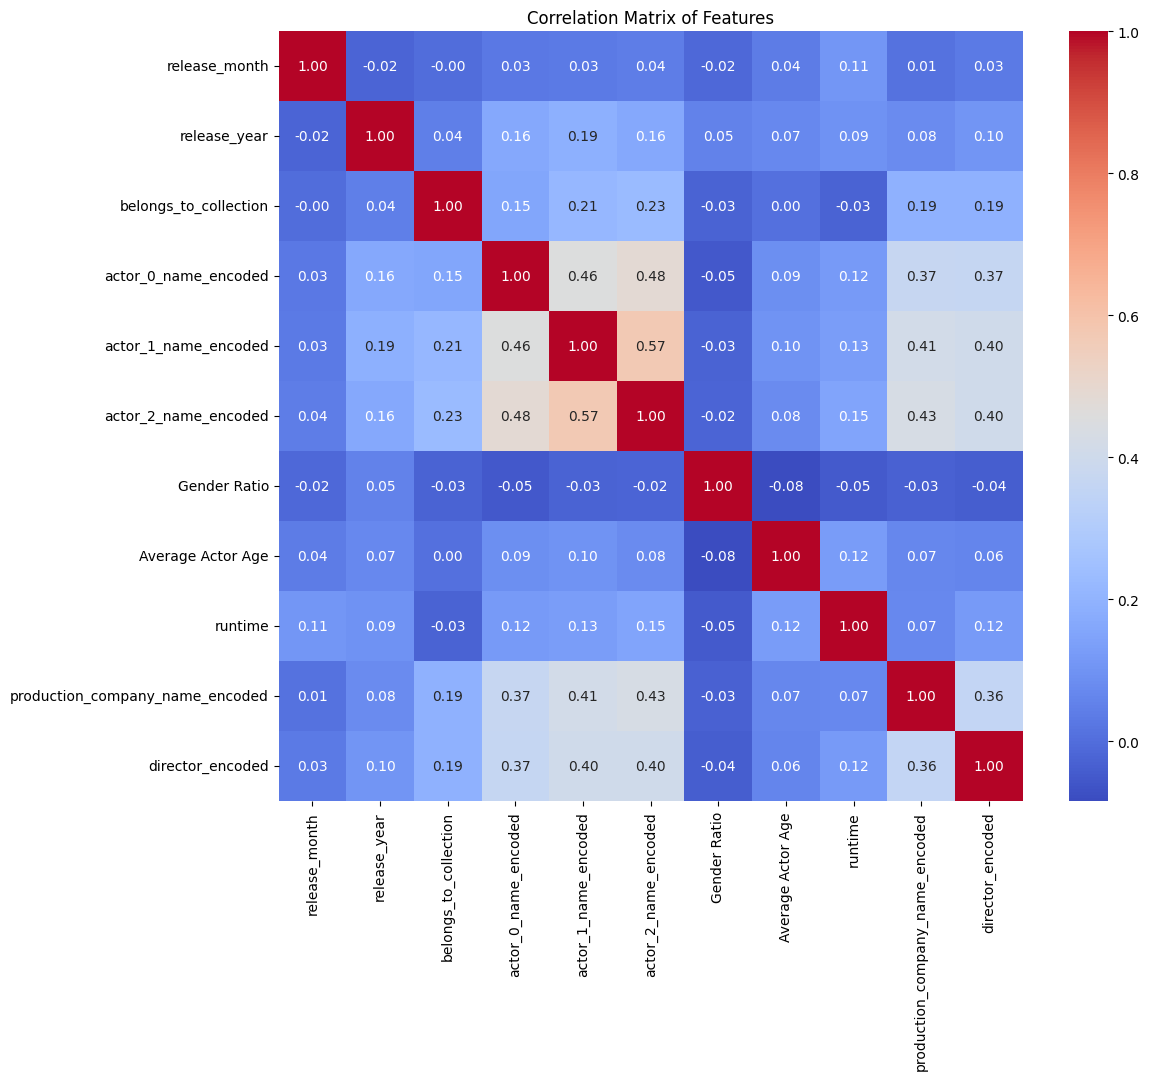

In [53]:

# Assuming you have your data stored in a DataFrame called 'df'
# If not, replace 'df' with the name of your DataFrame

features = ['release_month', 'release_year', 
            'belongs_to_collection', 'actor_0_name_encoded', 'actor_1_name_encoded', 
            'actor_2_name_encoded', 'Gender Ratio', 'Average Actor Age', 
            'runtime', 'production_company_name_encoded', 'director_encoded']

# Create a correlation matrix
correlation_matrix = data[features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title("Correlation Matrix of Features")

# Show the plot
plt.show()


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[feature_names], data[target], test_size=0.2, random_state=42)

In [55]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [56]:
# Print the mean squared error and R-squared value after imputation
print("Mean Squared Error (after imputation):", mean_squared_error(y_test, y_pred))
print("R-squared (after imputation):", r2_score(y_test, y_pred))

Mean Squared Error (after imputation): 5091849508405896.0
R-squared (after imputation): 0.7643636562656072


In [57]:
# Get the names of the features
feature_names = X_train.columns

# Print each feature and its corresponding weight
for feature, weight in zip(feature_names, model.coef_):
    print(f"{feature}: {weight}")


budget: 42817924.88708659
release_month: -1964560.971752569
release_year: -6233585.13039012
belongs_to_collection: 16840326.368055273
actor_0_name_encoded: 15415803.672775112
actor_1_name_encoded: 31083534.8045463
actor_2_name_encoded: 54561033.96662311
Gender Ratio: 2916691.5432623955
Average Actor Age: -3388905.5633508167
runtime: 7024548.823675152
production_company_name_encoded: 15483118.213687645
director_encoded: 22412577.727278493


In [58]:
from sklearn.preprocessing import StandardScaler

# Calculate the standard deviation of each feature
feature_std = X_train_scaled.std(axis=0)

# Scale the feature weights
scaled_weights = model.coef_ / feature_std

# Print the scaled feature weights
print("Scaled Feature Weights:")
for feature, weight in zip(features, scaled_weights):
    print(f"{feature}: {weight}")


Scaled Feature Weights:
release_month: 42817924.88708659
release_year: -1964560.9717525693
belongs_to_collection: -6233585.130390121
actor_0_name_encoded: 16840326.368055273
actor_1_name_encoded: 15415803.672775114
actor_2_name_encoded: 31083534.804546304
Gender Ratio: 54561033.96662311
Average Actor Age: 2916691.5432623955
runtime: -3388905.5633508167
production_company_name_encoded: 7024548.823675152
director_encoded: 15483118.213687645
